In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from esn import *

JAX requires the use of a PRNG (pseudo random number generator) key

In [2]:
key = jax.random.PRNGKey(1)

### Input signal

In [3]:
def sine(T, dt, a=1.0, b=0.0, c=1.0):
    return a * jnp.sin(b * jnp.arange(0, T, dt) - c * jnp.pi).reshape(-1, 1)

In [4]:
T = 80
dt = 0.1
ut = jnp.concatenate([
    sine(T, dt, a, b, c)
    for b in [0.5, 1., 1.5, 2.0, 1.0, 0.5]
    for c in [1]
    for a in [1]
], axis=0)
ut.shape

(4800, 1)

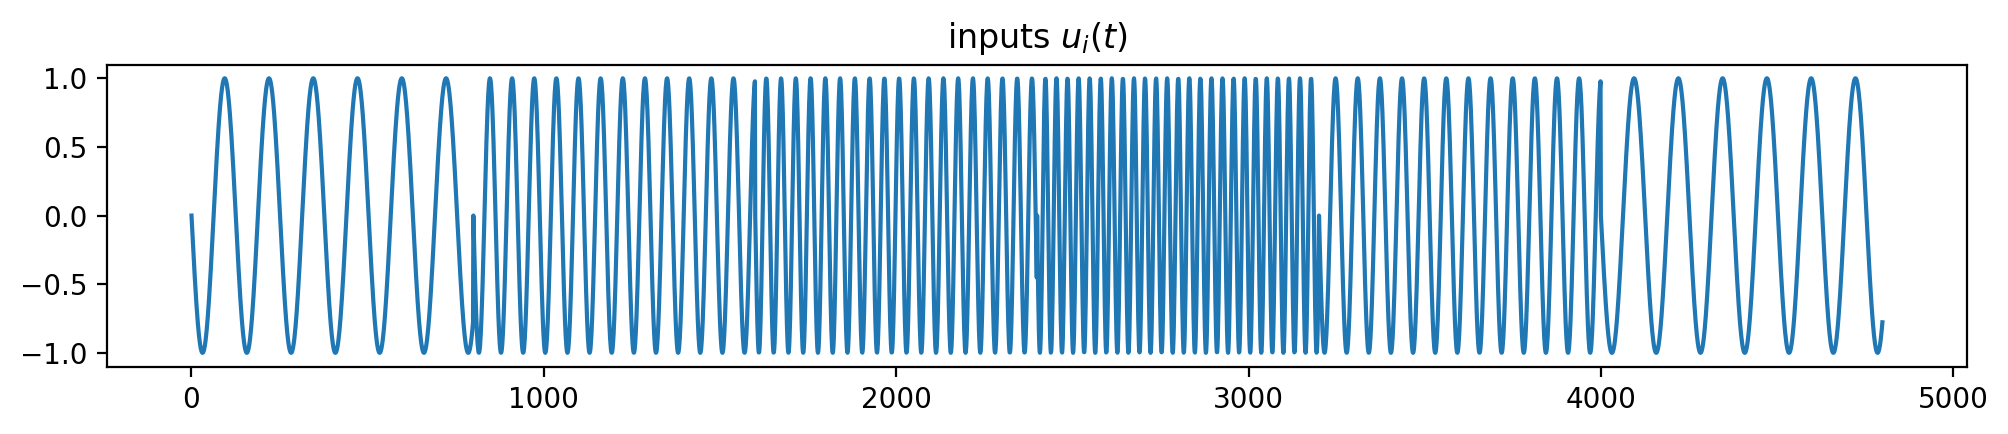

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12, 2), dpi=200)
ax.set_title('inputs $u_i(t)$')
# ax.set_xlim(-10, 500)
ax.plot(ut); 

### Train on identity function

In [6]:
reservoir_size = 10
input_size = ut.shape[1]
output_size = input_size

In [7]:
rho = 1.0
feedback = False
opt = LinearRegression()

In [8]:
config = ESNConfig(
    input_size      = input_size, 
    reservoir_size  = reservoir_size, 
    output_size     = output_size, 
    init_weights    = jax.random.uniform, 
    init_weights_in = jax.random.uniform,
    init_weights_b  = jax.random.uniform,
    rho             = rho, 
    feedback        = feedback
)
esn = ESN(key, config)

In [9]:
xt, yt1 = esn.harvest_states(ut)

In [10]:
esn.update_weights(xt, ut, ut.copy(), optimizer=opt)

In [11]:
yt2 = esn.forward(ut)

### Plots

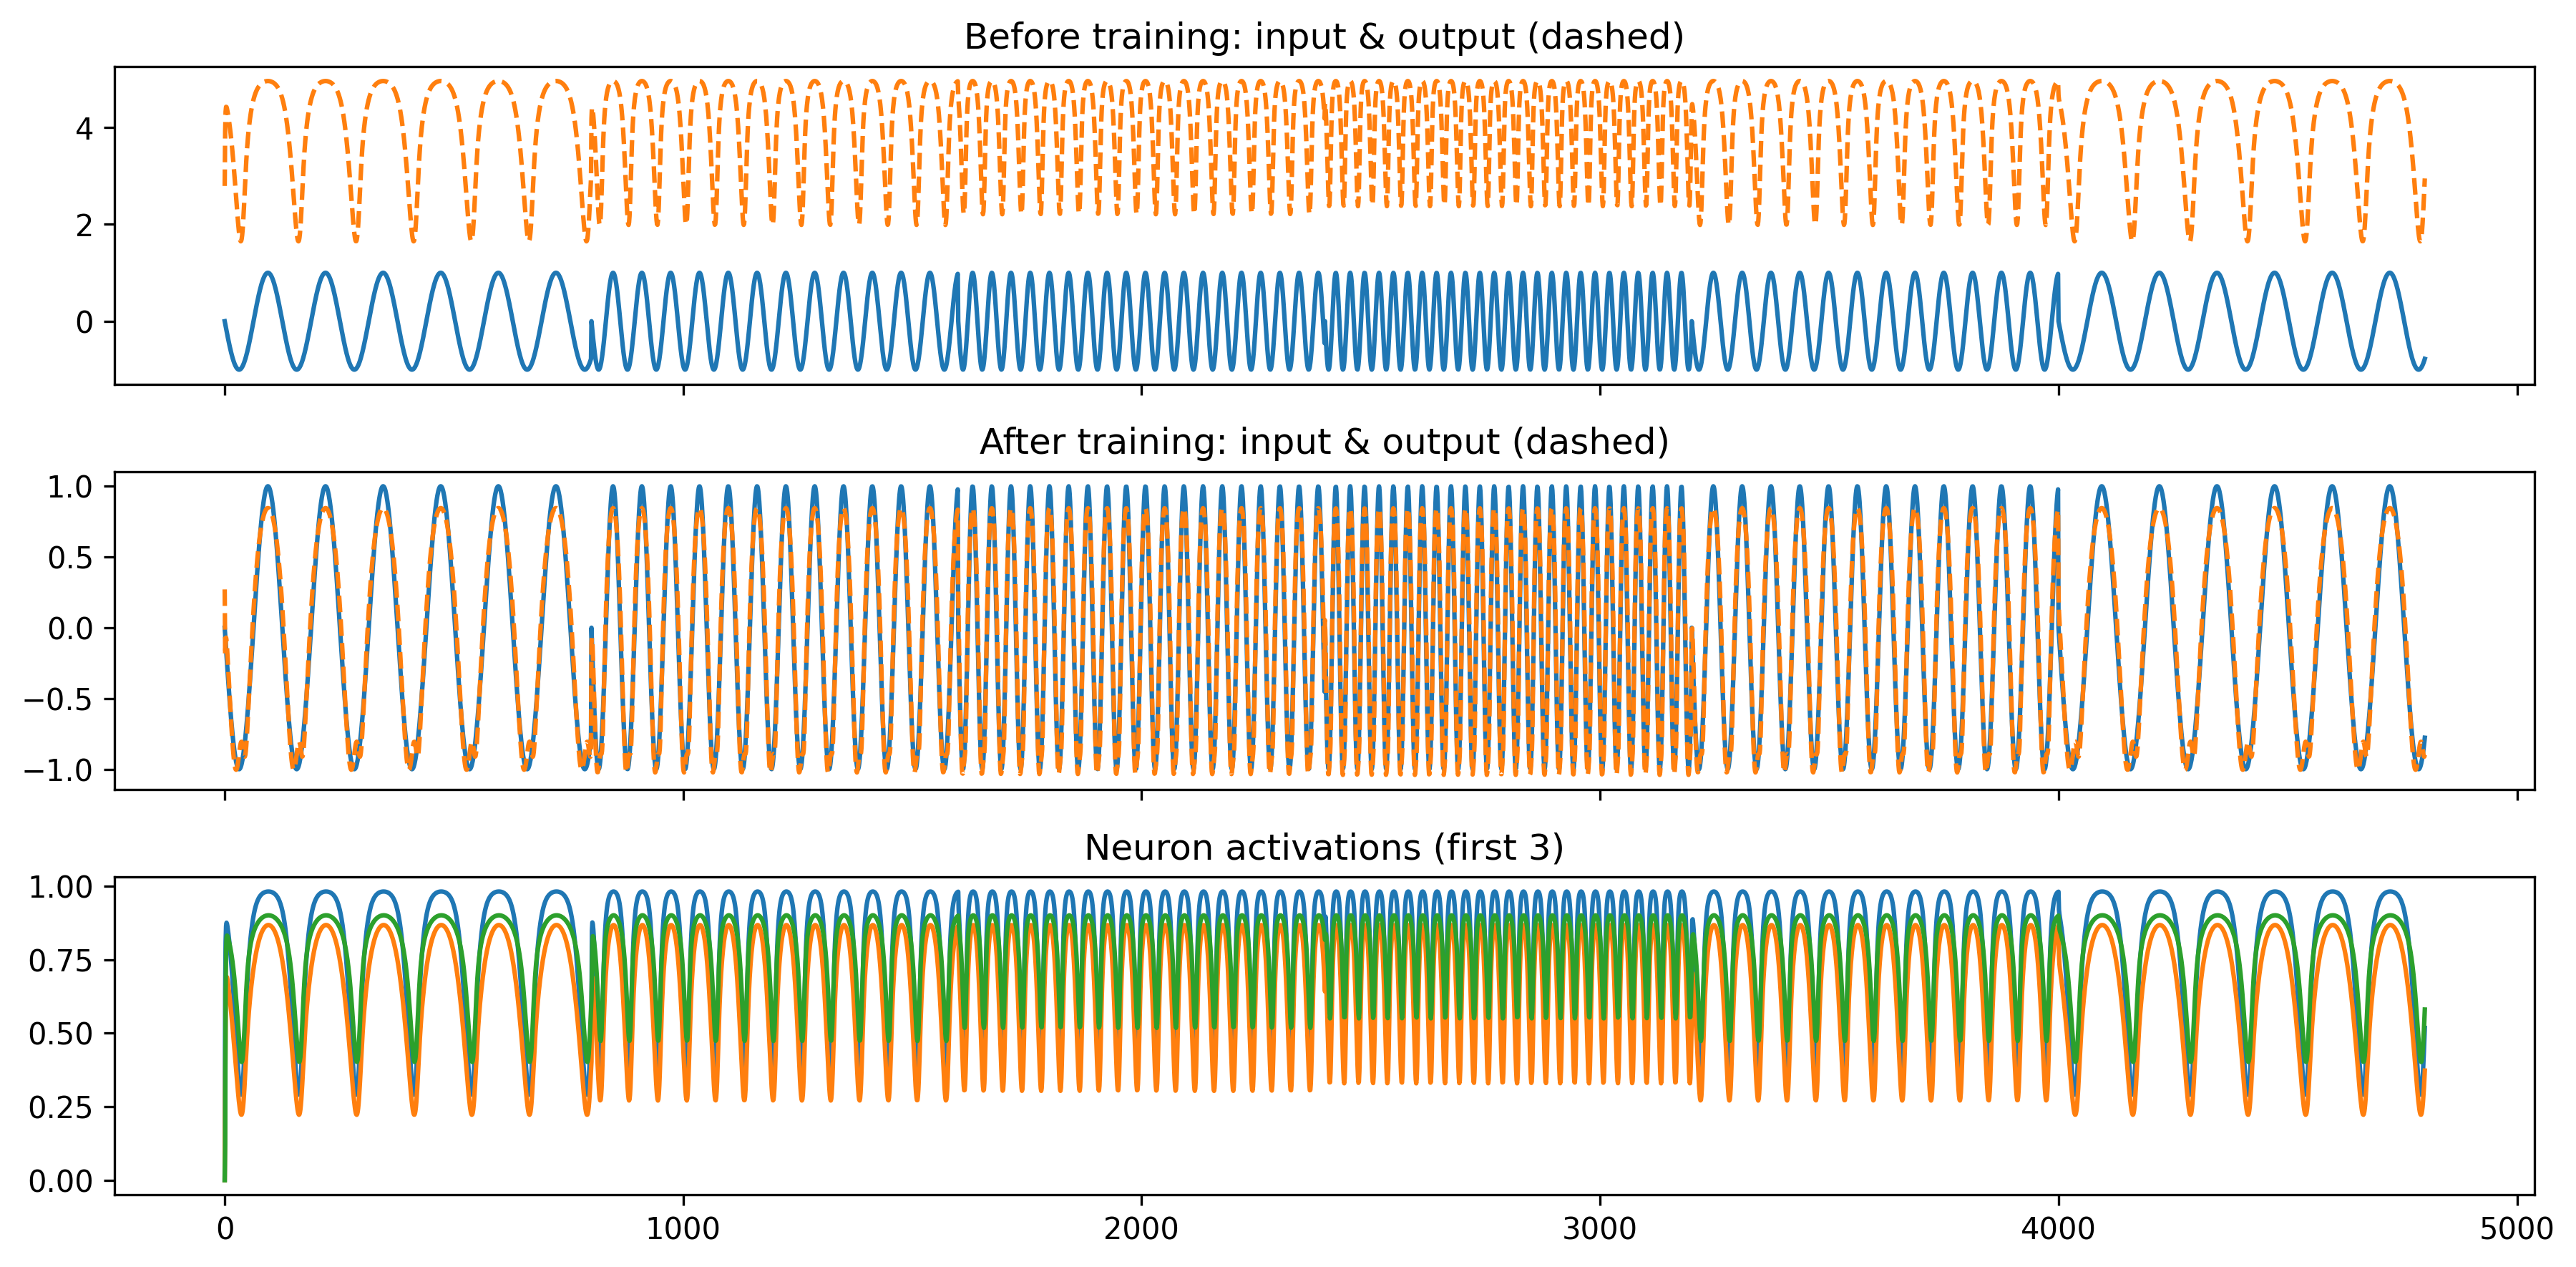

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True, dpi=300)
axs[0].set_title('Before training: input & output (dashed)')
axs[0].plot(ut, linestyle='-')
axs[0].plot(yt1, linestyle='--')
axs[1].set_title('After training: input & output (dashed)')
axs[1].plot(ut, linestyle='-')
axs[1].plot(yt2, linestyle='--')
axs[2].set_title('Neuron activations (first 3)')
axs[2].plot(xt[:,:3])
plt.tight_layout()
plt.show()